In [1]:
# !pip install -q -U git+https://github.com/sbrugman/SDGym.git@v0.2.2-hw

In [2]:
from sdgym import load_dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import pgmpy
from functools import partial

from pgmpy.estimators import TreeSearch
from phik.phik import phik_from_binned_array, phik_from_array

In [4]:
%matplotlib inline

In [5]:
import logging
logging.basicConfig(level=logging.INFO)

In [6]:
def prepare_data(dataset_name):
    data, categorical_columns, ordinal_columns = load_dataset(dataset_name)
    df = pd.DataFrame(data)
    df.columns = [str(i) for i in df.columns]
    return df

In [7]:
# interval_columns = list(map(str, set(range(data.shape[1])) - set(categorical_columns + ordinal_columns)))
# phik_fn = partial(phik_from_array, num_vars=interval_columns, bins=10)
phik_fn = phik_from_binned_array # if all categorical

In [8]:
def plot_structure_learning(df, dataset_name):
    fns = ["mutual_info", "normalized_mutual_info", phik_fn]
    fig, axs = plt.subplots(1, len(fns), figsize=(30, 5))
    fig.suptitle(f"Structure learning on {dataset_name}", fontsize=20)

    for idx, fn in enumerate(fns):
        # learn graph structure (preferred - fast)
        est = TreeSearch(df, root_node=df.columns[0])
        dag = est.estimate(estimator_type="tan", class_node=None, edge_weights_fn=fn)
        pos = graphviz_layout(dag, prog='dot')
        axs[idx].set_title(f"edge weights: {fn.__name__ if callable(fn) else fn}")
        nx.draw(dag, pos, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight='bold', ax=axs[idx])
    plt.savefig(f'tan_structure_{dataset_name}.pdf')
    plt.show()


In [9]:
def main(dataset_name):
    df = prepare_data(dataset_name)
    plot_structure_learning(df, dataset_name)

INFO:sdgym.data:Loading dataset adult (categorical variables, -1 distinct values threshold)
INFO:sdgym.data:Columns to zero-code: []
Building tree: 100%|██████████| 36/36.0 [00:00<00:00, 621.39it/s]
Building tree: 100%|██████████| 36/36.0 [00:00<00:00, 518.27it/s]
Building tree: 100%|██████████| 36/36.0 [00:00<00:00, 51.78it/s]


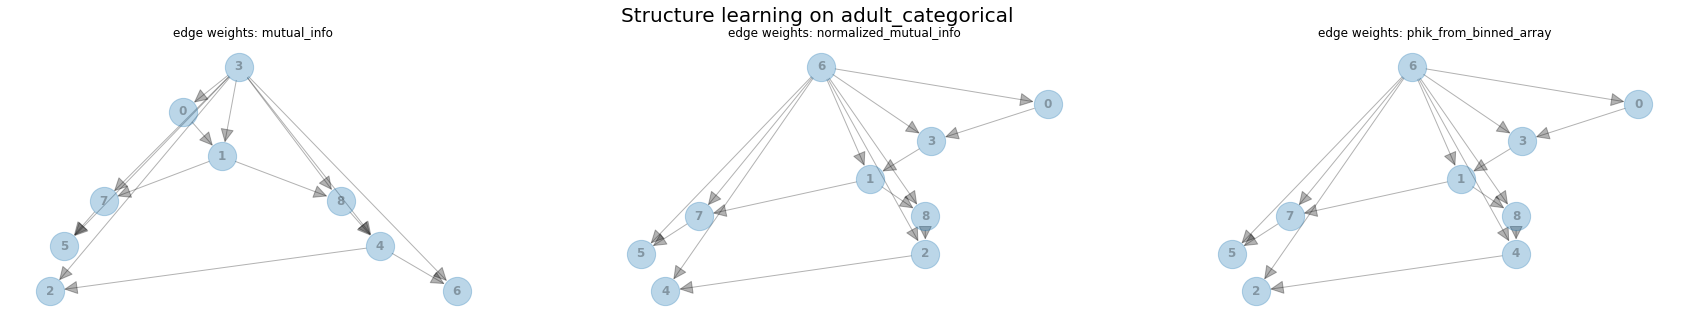

In [10]:
main('adult_categorical')

INFO:sdgym.data:Loading dataset census (categorical variables, -1 distinct values threshold)
INFO:sdgym.data:Columns to zero-code: []
Building tree: 100%|██████████| 561/561.0 [00:03<00:00, 144.33it/s]
Building tree: 100%|██████████| 561/561.0 [00:06<00:00, 84.57it/s]
Building tree: 100%|██████████| 561/561.0 [01:37<00:00,  5.77it/s]


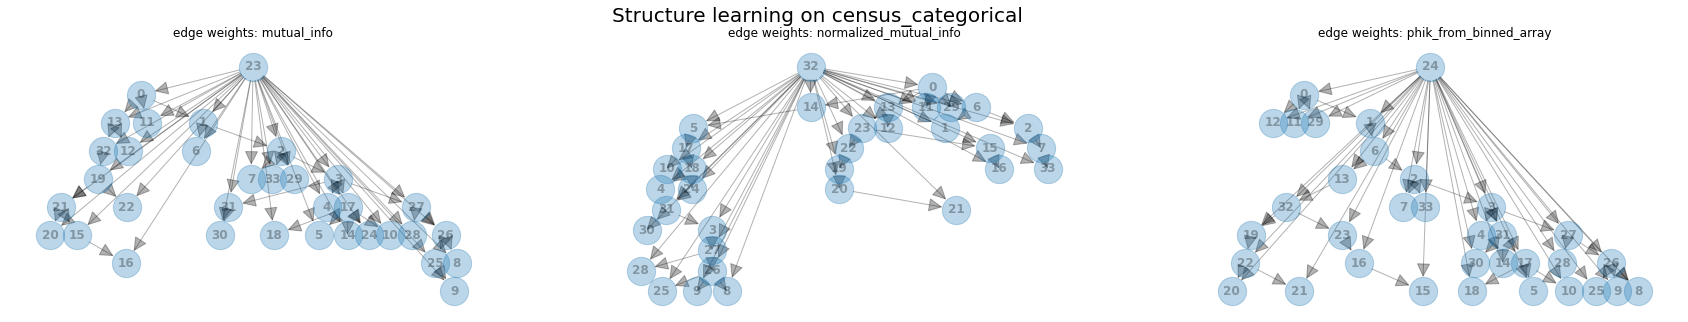

In [11]:
main('census_categorical')

INFO:sdgym.data:Loading dataset asia (all variables, -1 distinct values threshold)
INFO:sdgym.data:Columns to zero-code: []
Building tree: 100%|██████████| 28/28.0 [00:00<00:00, 1415.00it/s]
Building tree: 100%|██████████| 28/28.0 [00:00<00:00, 976.60it/s]
Building tree: 100%|██████████| 28/28.0 [00:00<00:00, 107.99it/s]


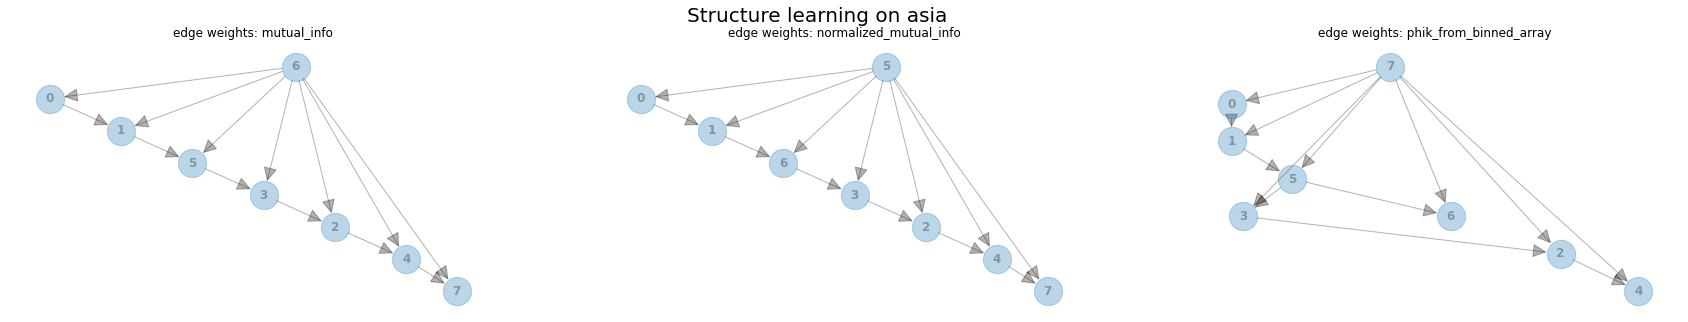

In [12]:
main('asia')

INFO:sdgym.data:Loading dataset child (all variables, -1 distinct values threshold)
INFO:sdgym.data:Columns to zero-code: []
Building tree: 100%|██████████| 190/190.0 [00:00<00:00, 811.00it/s]
Building tree: 100%|██████████| 190/190.0 [00:00<00:00, 546.27it/s]
Building tree: 100%|██████████| 190/190.0 [00:02<00:00, 66.86it/s]


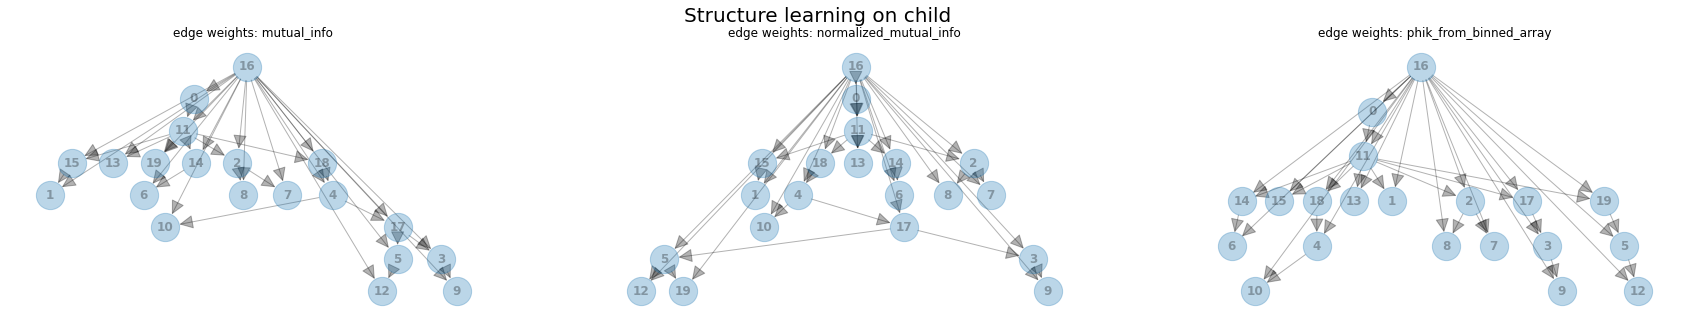

In [13]:
main('child')

INFO:sdgym.data:Loading dataset insurance (all variables, -1 distinct values threshold)
INFO:sdgym.data:Columns to zero-code: []
Building tree: 100%|██████████| 351/351.0 [00:00<00:00, 743.54it/s]
Building tree: 100%|██████████| 351/351.0 [00:00<00:00, 495.71it/s]
Building tree: 100%|██████████| 351/351.0 [00:06<00:00, 57.92it/s]


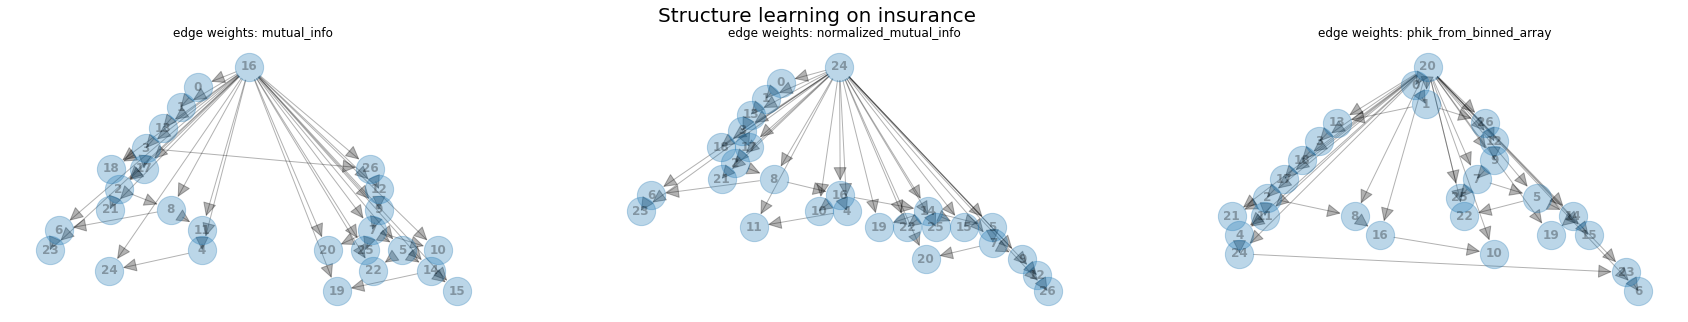

In [14]:
main('insurance')

INFO:sdgym.data:Loading dataset news (categorical variables, -1 distinct values threshold)
INFO:sdgym.data:Columns to zero-code: []
Building tree: 100%|██████████| 105/105.0 [00:00<00:00, 678.15it/s]
Building tree: 100%|██████████| 105/105.0 [00:00<00:00, 440.78it/s]
Building tree: 100%|██████████| 105/105.0 [00:03<00:00, 26.59it/s]
/Users/macbook-work/Documents/code/synthsonic-/venv5/lib/python3.8/site-packages/phik/data_quality.py:118: UserWarning: The number of unique values of variable y is large: 2. Are you sure this is not an interval variable? Analysis might be slow.
  warnings.warn(
/Users/macbook-work/Documents/code/synthsonic-/venv5/lib/python3.8/site-packages/phik/data_quality.py:118: UserWarning: The number of unique values of variable y is large: 2. Are you sure this is not an interval variable? Analysis might be slow.
  warnings.warn(
/Users/macbook-work/Documents/code/synthsonic-/venv5/lib/python3.8/site-packages/phik/data_quality.py:118: UserWarning: The number of uniqu

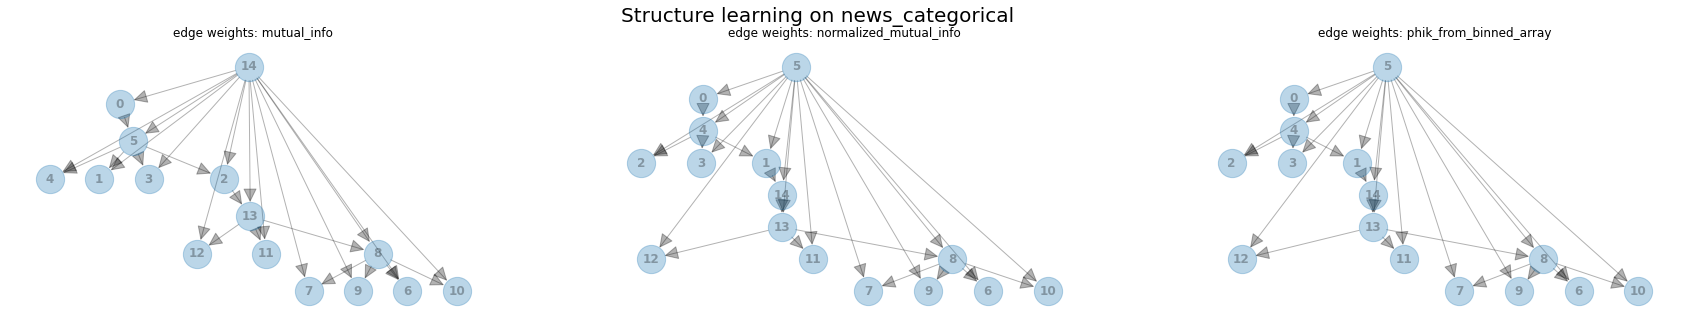

In [15]:
main('news_categorical')